In [1]:
include("cliff5.jl")
include("sym_cliff.jl")
using Plots

In [74]:
add_II_left(tmp) = Tuple((II, a) for a in tmp)
add_II_right(tmp) = Tuple((a, II) for a in tmp)
rand_1cliff_1cliff() = (add_II_right(random_1clifford())..., add_II_left(random_1clifford())...)

p_CZ(p) = rand()<p ? CZ : IID 

tp(a, b) = Tuple(zip(a, b))

concat(cliff1, cliff2) = Tuple(cliff2_action(cliff2, tmp[1], tmp[2]) for tmp in cliff1)
function concat(cliff_collect...)
    tmp = cliff_collect[1]
    for cliff in cliff_collect[2:end]
        tmp = concat(tmp, cliff)
    end
    return tmp
end

clear(dict::Dict) = [dict[k] = 0 for k in keys(dict)]

clear (generic function with 1 method)

In [43]:
dict = Dict{NTuple{6,Tuple{Paulis,Paulis}}, Int}()
for _ in 1:10000
    tmp = random_2clifford()
    if !(tmp in keys(dict))
        dict[tmp] = 1
    end
end

cliffs_list = [clf for clf in keys(dict)];

In [2]:
sym_dict = Dict{NTuple{6,Tuple{Paulis,Paulis}}, Int}()
for _ in 1:10000
    tmp = Z2_2clifford()
    if !(tmp in keys(sym_dict))
        sym_dict[tmp] = 1
    end
end

sym_cliffs_list = [clf for clf in keys(sym_dict)];

## $C2+C2$

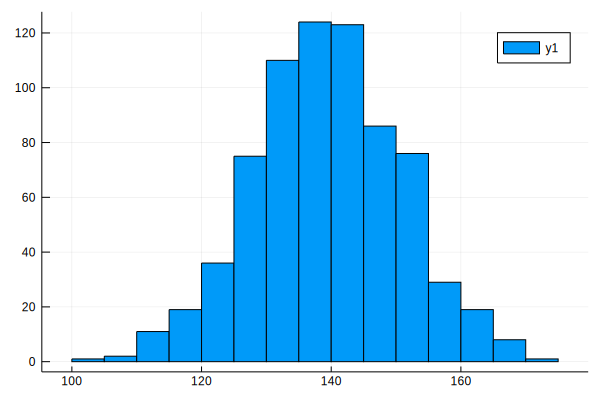

In [113]:
clear(dict)
for _ in 1:1e5
    cliff = concat(random_2clifford(), random_2clifford())
    dict[cliff] +=1 
end

results = [i for i in values(dict)]
histogram(results)

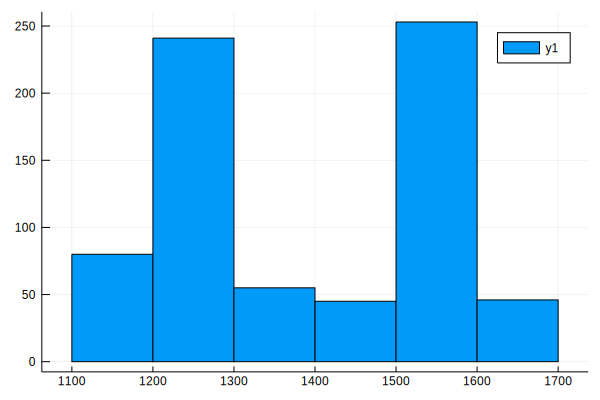

In [117]:
clear(dict)
for _ in 1:1e6
    cliff = concat(rand_1cliff_1cliff(), p_CZ(1), rand_1cliff_1cliff(), p_CZ(1), rand_1cliff_1cliff(), p_CZ(1), rand_1cliff_1cliff())
    dict[cliff] +=1
end

results = [i for i in values(dict)]
histogram(results)

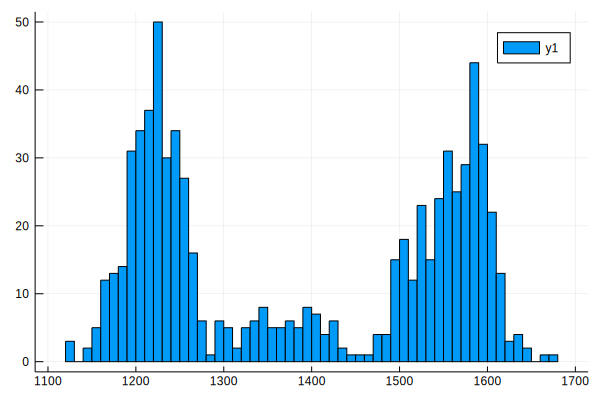

In [118]:
histogram(results,bins=100)

In [88]:
p_CZ(0.5)

((X, Z), (Y, Z), (Z, II), (Z, X), (Z, Y), (II, Z))

In [3]:
length(sym_cliffs_list)

48